In [123]:
import readpw; reload(readpw)
from readpw import Passwords
%matplotlib inline
rypw = Passwords('rockyou-withcount.txt.bz2')

In [131]:
freq_level = {}
import numpy as np
f = -np.log2(rypw._freq_list[np.nonzero(rypw._freq_list)]/rypw.totalf())
fceil = np.ceil(f)

[  0.                 -inf   1.           1.5849625    2.32192809
   5.5849625    7.20945337   8.51175265   9.77643303  10.7548875
  11.77684423  12.90407008  14.18835703  15.25654042  16.32551628
  17.405316    18.67371969  23.6958558 ]


/Users/rahul/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log2


24.957556552287688

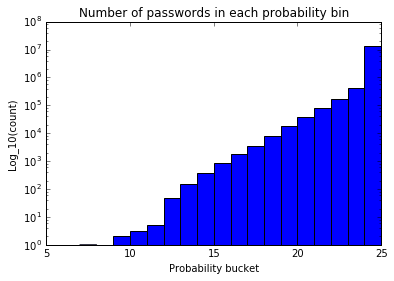

In [201]:
# np.histogram(fceil, bins=range(7,26))

plt.hist(fceil, bins=range(7,26), log=True)
plt.title("Number of passwords in each probability bin")
plt.xlabel("Probability bucket")
plt.ylabel("Log_10(count)")

# these are the counts of each probability bucket. The first bucket starts from 7, ends at 25.
print np.log2([       1,        0,        2,        3,        5,       48,
             148,      365,      877,     1728,     3509,     7665,
           18669,    39145,    82124,   173589,   418167, 13588245])

np.log2(rypw.totalf())

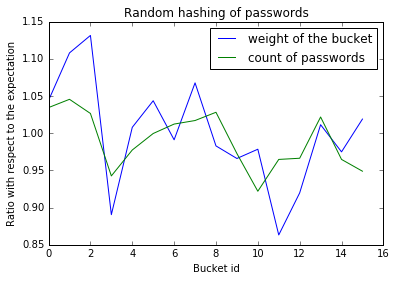

In [204]:
from hashlib import sha256
import os
sa = os.urandom(16)
def hash_(s):
    return sha256(bytes(s)+sa).hexdigest()[0]
bins = {hex(i)[-1:]: [0,0] for i in xrange(16)}

ignore_first = 100
total_pws = 10000 + ignore_first
for i, (pw,f) in enumerate(rypw.pws_in_order()):
    if i<ignore_first: continue
    bins[hash_(pw)][0] += f
    bins[hash_(pw)][1] += 1
    if i>total_pws: break
tot = float(sum(f for f,c in bins.values()))
expected = tot/16
cntmean = total_pws/16.0
x,y,z = zip(*sorted([(int(k, base=16),v/expected, c/cntmean) for k,(v,c) in bins.items()]))
plt.plot(x,y)
plt.plot(x,z)
plt.title("Random hashing of passwords")
plt.xlabel("Bucket id")
plt.ylabel("Ratio with respect to the expectation")
plt.legend(['weight of the bucket', 'count of passwords',])

# Point to note, that on many many runs the maximum and minimum bucket weight stays within,
# 15% daviation from the expected value.